In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
cardio_data = pd.read_csv("Cardiotocographic.csv")

In [3]:
cardio_data.head()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,2.4,64,62,126,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,10.4,130,68,198,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,13.4,130,68,198,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,23.0,117,53,170,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,19.9,117,53,170,1


In [4]:
cardio_data.tail()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
2121,140,0.000000,0.000000,0.007426,0.0,0.0,0.0,79,0.2,25,7.2,40,137,177,2
2122,140,0.000775,0.000000,0.006971,0.0,0.0,0.0,78,0.4,22,7.1,66,103,169,2
2123,140,0.000980,0.000000,0.006863,0.0,0.0,0.0,79,0.4,20,6.1,67,103,170,2
2124,140,0.000679,0.000000,0.006110,0.0,0.0,0.0,78,0.4,27,7.0,66,103,169,2
2125,142,0.001616,0.001616,0.008078,0.0,0.0,0.0,74,0.4,36,5.0,42,117,159,1


In [5]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BPM     2126 non-null   int64  
 1   APC     2126 non-null   float64
 2   FMPS    2126 non-null   float64
 3   UCPS    2126 non-null   float64
 4   DLPS    2126 non-null   float64
 5   SDPS    2126 non-null   float64
 6   PDPS    2126 non-null   float64
 7   ASTV    2126 non-null   int64  
 8   MSTV    2126 non-null   float64
 9   ALTV    2126 non-null   int64  
 10  MLTV    2126 non-null   float64
 11  Width   2126 non-null   int64  
 12  Min     2126 non-null   int64  
 13  Max     2126 non-null   int64  
 14  NSP     2126 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 249.3 KB


In [6]:
cardio_data.shape

(2126, 15)

In [7]:
cardio_data['NSP'].value_counts()

NSP
1    1655
2     295
3     176
Name: count, dtype: int64

<Axes: xlabel='NSP', ylabel='count'>

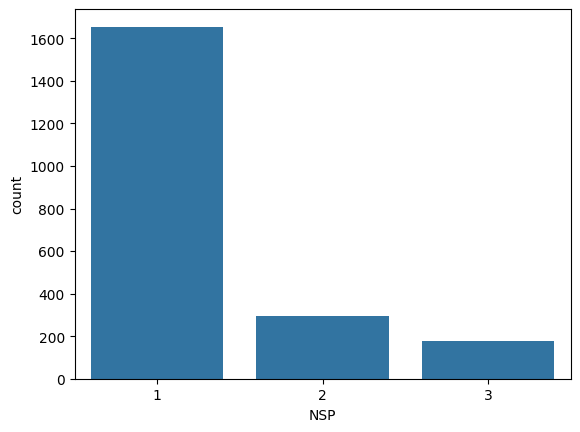

In [8]:
sns.countplot(cardio_data, x="NSP")

In [9]:
x = cardio_data.drop("NSP", axis=1)
y = cardio_data['NSP'] - 1

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state=0)

# x_train = x_train.to_numpy()
# x_test = x_test.to_numpy()
# y_train = y_train.to_numpy()
# y_test = y_test.to_numpy()

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
model = tf.keras.models.Sequential()

In [11]:
model.add(tf.keras.layers.Dense(9, activation='relu', input_shape=(14,)))
model.add(tf.keras.layers.Dense(3, activation="softmax"))

/Users/oluwadarasimioloyede/mldm/mldmenv2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 9)              │           135 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
class_weights = {0:1, 1:6.5, 2:9.4}

In [15]:
history = model.fit(x_train, np.asarray( y_train), batch_size = 32, epochs= 200, verbose=2, class_weight=class_weights, validation_split=0.2)

Epoch 1/200
43/43 - 0s - 9ms/step - accuracy: 0.2118 - loss: 4.2344 - val_accuracy: 0.2235 - val_loss: 1.2629
Epoch 2/200
43/43 - 0s - 984us/step - accuracy: 0.2228 - loss: 3.1617 - val_accuracy: 0.2559 - val_loss: 1.1631
Epoch 3/200
43/43 - 0s - 955us/step - accuracy: 0.2588 - loss: 2.5485 - val_accuracy: 0.3147 - val_loss: 1.0943
Epoch 4/200
43/43 - 0s - 945us/step - accuracy: 0.3368 - loss: 2.2152 - val_accuracy: 0.3882 - val_loss: 1.0282
Epoch 5/200
43/43 - 0s - 934us/step - accuracy: 0.4103 - loss: 2.0263 - val_accuracy: 0.4618 - val_loss: 0.9726
Epoch 6/200
43/43 - 0s - 936us/step - accuracy: 0.5015 - loss: 1.8989 - val_accuracy: 0.5588 - val_loss: 0.9162
Epoch 7/200
43/43 - 0s - 955us/step - accuracy: 0.5772 - loss: 1.7983 - val_accuracy: 0.6412 - val_loss: 0.8648
Epoch 8/200
43/43 - 0s - 923us/step - accuracy: 0.6235 - loss: 1.7150 - val_accuracy: 0.6824 - val_loss: 0.8206
Epoch 9/200
43/43 - 0s - 919us/step - accuracy: 0.6544 - loss: 1.6429 - val_accuracy: 0.7235 - val_loss: 0

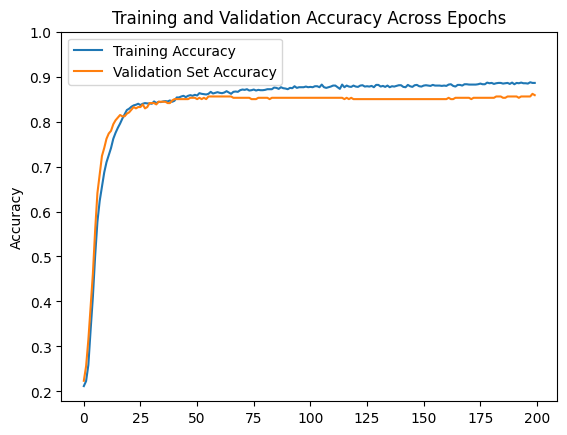

In [16]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
#plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title("Training and Validation Accuracy Across Epochs")
plt.legend()

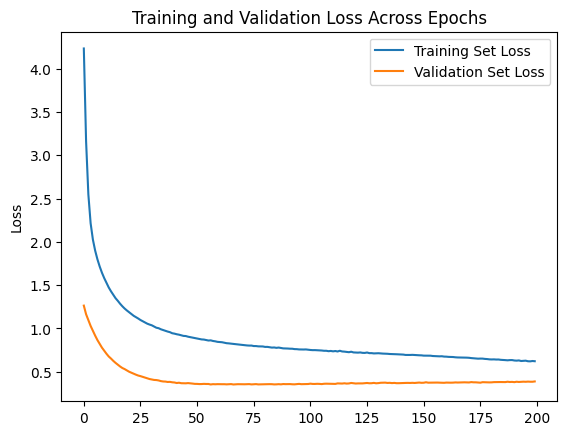

In [17]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title("Training and Validation Loss Across Epochs")
plt.legend()

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


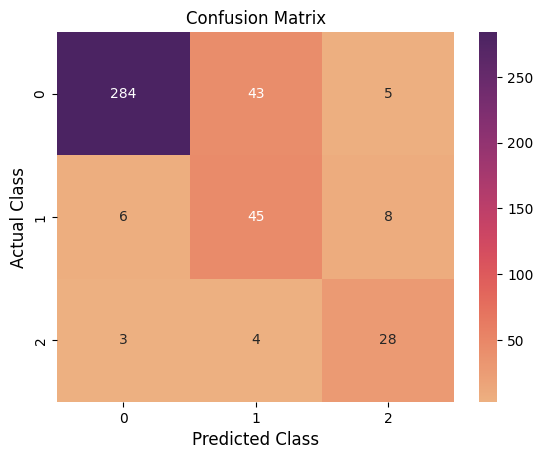

In [20]:
cm = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')

plt.xlabel("Predicted Class", fontsize = 12)
plt.ylabel("Actual Class", fontsize = 12)
plt.title("Confusion Matrix", fontsize = 12)
plt.show()

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       332
           1       0.49      0.76      0.60        59
           2       0.68      0.80      0.74        35

    accuracy                           0.84       426
   macro avg       0.71      0.81      0.75       426
weighted avg       0.88      0.84      0.85       426

